In [1]:
import numpy as np
import json
import torch

import matplotlib.pyplot as plt
from datamodules.utils import JetFeatures,  ParticleClouds
from datamodules.aoj import AspenOpenJets

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data, metadata = aoj(num_jets=1_900_000, download=False, features={"continuous": ["pt", "eta", "phi"], "discrete": 'tokens'},)
jets = ParticleClouds(data)

/home/df630/Multimodal-Bridges/multimodal_bridges/datamodules/aoj.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


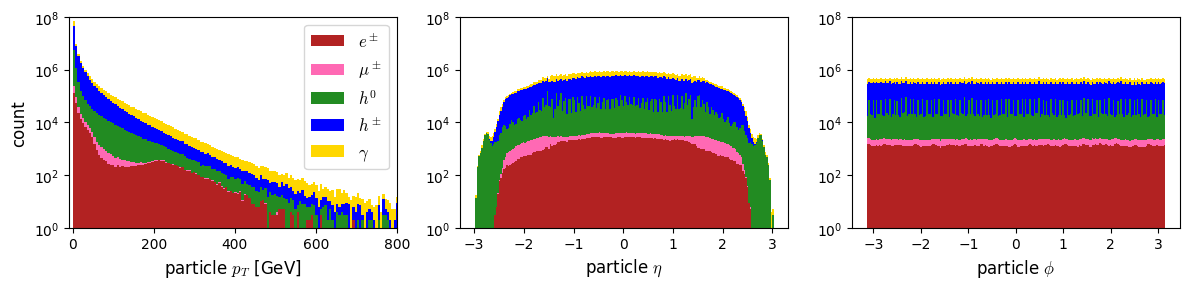

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import torch  # For tensor to numpy conversion if needed
from matplotlib.lines import Line2D

flavors = [
    "Electron",
    "Muon",
    "NeutralHadron",
    "ChargedHadron",
    "Photon",
]

flavor_colors = {
    "Photon": "gold",      
    "NeutralHadron": "forestgreen",    
    "ChargedHadron": "blue",   
    "Electron": "firebrick",       
    "Muon": "hotpink",            
}

flavor_labels= {
    "Photon": r"$\gamma$",   
    "NeutralHadron": r"$h^{0}$", 
    "ChargedHadron": r"$h^\pm$",  
    "Electron": r"$e^\pm$",      
    "Muon": r"$\mu^\pm$"     
}

colors = [flavor_colors[flavor] for flavor in flavors]
labels = [flavor_labels[flavor] for flavor in flavors]
features = ['pt', 'eta', 'phi']

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# jets.histplot('pt', bins=300, ax=axes[0], color='k', lw=0.5, fill=False)
# jets.histplot('eta_rel', bins=200, ax=axes[1], color='k', lw=0.5, fill=False)
# jets.histplot('phi_rel', bins=200, ax=axes[2], color='k', lw=0.5, fill=False)

for ax, feature in zip(axes, features):

    data_list = []

    for flavor in flavors:
        feature_data = getattr(jets, f"{feature}_{flavor}")
        if isinstance(feature_data, torch.Tensor):
            feature_data = feature_data.detach().cpu().numpy()
        data_list.append(feature_data)

    if feature == 'pt':
        all_data = np.concatenate(data_list)
        positive_data = all_data[all_data > 0]
        xmin = positive_data.min() if positive_data.size > 0 else 1e-2
        xmax = all_data.max() if all_data.size > 0 else 10
        bins = 300
        ax.set_yscale("log")
        xlabel = r"particle $p_T$ [GeV]"

    elif feature == 'eta':
        bins = 200 
        ax.set_yscale("log")
        xlabel = "particle $\eta$"

    elif feature == 'phi':
        bins = 200  
        ax.set_yscale("log")
        xlabel = "particle $\phi$"

    ax.hist(data_list, bins=bins, stacked=True, label=labels, color=colors, edgecolor=None)

    ax.set_ylim(1, 1e8)
    axes[0].set_xlim(-10, 800)
    ax.set_xlabel(xlabel, fontsize=12)
    axes[0].set_ylabel("count", fontsize=12)
    axes[0].legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.savefig("particle_feats.png", dpi=1000)
plt.show()


In [186]:
from matplotlib.lines import Line2D

def display_cloud(
        jets,
        idx,
        scale_marker=1.0,
        ax=None,
        figsize=(3.2, 3),
        facecolor="whitesmoke",
        title_box_anchor=(1.025, 1.125),
        savefig=None,
        legend=False
    ):
        eta =  jets.eta_rel[idx]
        phi =  jets.phi_rel[idx]
        pt = jets.pt[idx] * scale_marker
        N = jets.mask[idx].squeeze(-1).sum().item()

        if ax is None:
            _, ax = plt.subplots(figsize=figsize)

        ax.scatter(
            eta[jets.isPhoton[idx]],
            phi[jets.isPhoton[idx]],
            marker="o",
            s=pt[jets.isPhoton[idx]],
            color="gold",
            alpha=0.5,
            label=r"$\gamma$",
        )
        ax.scatter(
            eta[jets.isNeutralHadron[idx]],
            phi[jets.isNeutralHadron[idx]],
            marker="o",
            s=pt[jets.isNeutralHadron[idx]],
            color="forestgreen",
            alpha=0.5,
            label=r"$h^{0}$",
        )
        ax.scatter(
            eta[jets.isNegativeHadron[idx]],
            phi[jets.isNegativeHadron[idx]],
            marker="^",
            s=pt[jets.isNegativeHadron[idx]],
            color="blue",
            alpha=0.5,
            label=r"$h^{-}$",
        )
        ax.scatter(
            eta[jets.isPositiveHadron[idx]],
            phi[jets.isPositiveHadron[idx]],
            marker="v",
            s=pt[jets.isPositiveHadron[idx]],
            color="blue",
            alpha=0.5,
            label=r"$h^{+}$",
        )
        ax.scatter(
            eta[jets.isNegativeElectron[idx]],
            phi[jets.isNegativeElectron[idx]],
            marker="^",
            s=pt[jets.isNegativeElectron[idx]],
            color="firebrick",
            alpha=0.5,
            label=r"$e^{-}$",
        )
        ax.scatter(
            eta[jets.isPositron[idx]],
            phi[jets.isPositron[idx]],
            marker="v",
            s=pt[jets.isPositron[idx]],
            color="firebrick",
            alpha=0.5,
            label=r"$e^{+}$",
        )
        ax.scatter(
            eta[jets.isNegativeMuon[idx]],
            phi[jets.isNegativeMuon[idx]],
            marker="^",
            s=pt[jets.isNegativeMuon[idx]],
            color="hotpink",
            alpha=0.5,
            label=r"$\mu^{-}$",
        )
        ax.scatter(
            eta[jets.isPositiveMuon[idx]],
            phi[jets.isPositiveMuon[idx]],
            marker="v",
            s=pt[jets.isPositiveMuon[idx]],
            color="hotpink",
            alpha=0.5,
            label=r"$\mu^{+}$",
        )

        # Define custom legend markers
        h1 = Line2D([0], [0], marker="o", markersize=6, alpha=0.5, color="gold", linestyle="None")
        h2 = Line2D([0], [0], marker="o", markersize=6, alpha=0.5, color="forestgreen", linestyle="None")
        h3 = Line2D([0], [0], marker="^", markersize=6, alpha=0.5, color="blue", linestyle="None")
        h4 = Line2D([0], [0], marker="v", markersize=6, alpha=0.5, color="blue", linestyle="None")
        h5 = Line2D([0], [0], marker="^", markersize=6, alpha=0.5, color="firebrick", linestyle="None")
        h6 = Line2D([0], [0], marker="v", markersize=6, alpha=0.5, color="firebrick", linestyle="None")
        h7 = Line2D([0], [0], marker="^", markersize=6, alpha=0.5, color="hotpink", linestyle="None")
        h8 = Line2D([0], [0], marker="v", markersize=6, alpha=0.5, color="hotpink", linestyle="None")

        if legend:
            # Place legend outside the axis on the right-hand side as a vertical column.
            ax.legend(
                [h1, h2, h3, h4, h5, h6, h7, h8],
                [r"$\gamma$", r"$h^0$", r"$h^-$", r"$h^+$", r"$e^-$", r"$e^+$", r"$\mu^{-}$", r"$\mu^{+}$"],
                loc="center left",          # Anchor the legend to the center left of the bbox.
                bbox_to_anchor=(1.05, 0.5),   # Shift the legend to the right.
                markerscale=2,
                scatterpoints=1,
                fontsize=12,
                frameon=False,
                ncol=1,                     # Single column (vertical layout)
                handletextpad=0.5,
                columnspacing=1.0,
            )

        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(
            0.975,
            0.975,
            fr"$N={N}$",
            fontsize=14,
            ha="right",
            va="top",
            transform=ax.transAxes,
        )
        ax.set_facecolor(facecolor)  # Set the axis background color
        if savefig is not None:
            plt.savefig(savefig, dpi=1000)


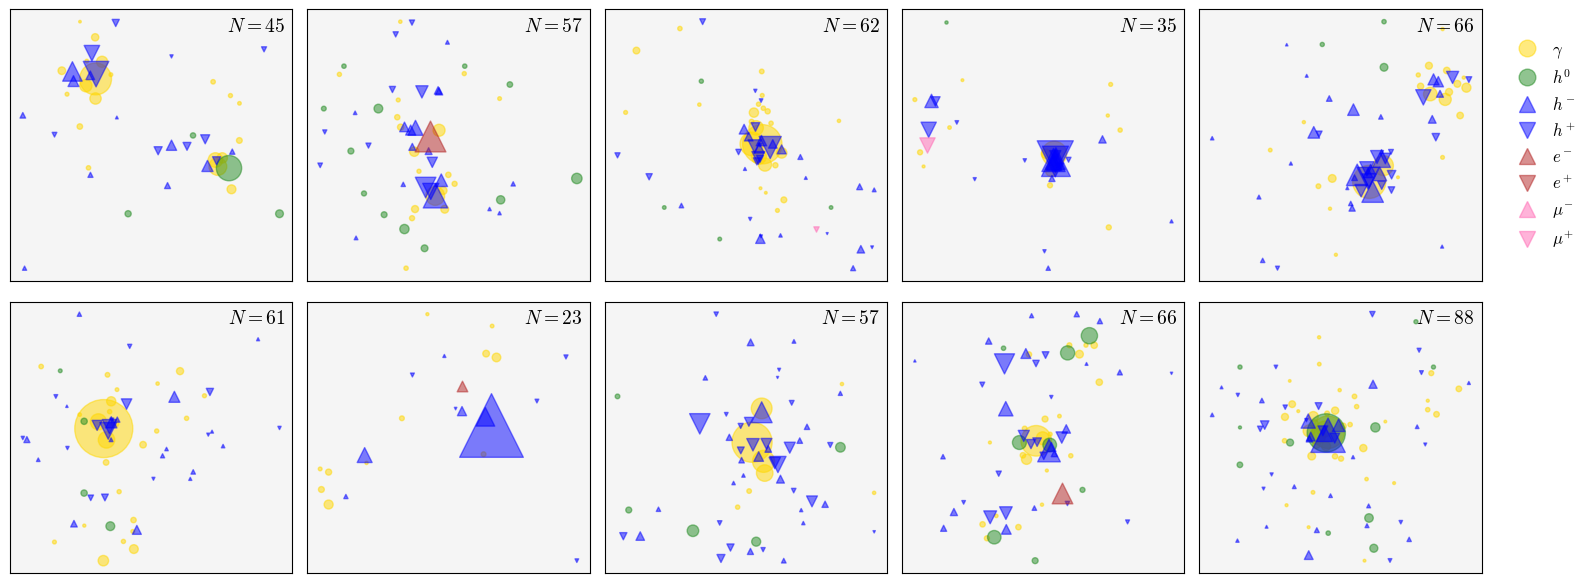

In [187]:

_, ax = plt.subplots(2, 5, figsize=(16, 6))
display_cloud(jets, 104, scale_marker=10, ax=ax[0,0])
display_cloud(jets, 164, scale_marker=10, ax=ax[0,1])
display_cloud(jets, 184, scale_marker=10,  ax=ax[0,2])
display_cloud(jets, 1, scale_marker=10,  ax=ax[0,3])
display_cloud(jets, 115, scale_marker=10,  ax=ax[0,4], legend=True)
display_cloud(jets, 13, scale_marker=10,  ax=ax[1,0])
display_cloud(jets, 107, scale_marker=10,  ax=ax[1,1])
display_cloud(jets, 2222, scale_marker=10, ax=ax[1,2])
display_cloud(jets, 177, scale_marker=10, ax=ax[1,3])
display_cloud(jets, 3657, scale_marker=10, ax=ax[1,4])
plt.tight_layout()
plt.savefig("particle_clouds.png", dpi=500)


In [ ]:
def flavor_mask(jets,idx):
    return lambda x : x[((jets.constituents.discrete.squeeze(-1) == idx) * jets.constituents.mask_bool)]

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.constituents.histplot("d0_ratio", apply_map=flavor_mask(jets, 2) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))
jets.constituents.histplot("d0_ratio", apply_map=flavor_mask(jets, 3) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))
jets.constituents.histplot("d0_ratio", apply_map=flavor_mask(jets, 4) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))
jets.constituents.histplot("d0_ratio", apply_map=flavor_mask(jets, 5) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))

In [ ]:
def flavor_mask(jets,idx):
    return lambda x : x[((jets.constituents.discrete.squeeze(-1) == idx) * jets.constituents.mask_bool)]

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.constituents.histplot("dz_ratio", apply_map=flavor_mask(jets, 2) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))
jets.constituents.histplot("dz_ratio", apply_map=flavor_mask(jets, 3) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))
jets.constituents.histplot("dz_ratio", apply_map=flavor_mask(jets, 4) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))
jets.constituents.histplot("dz_ratio", apply_map=flavor_mask(jets, 5) ,ax=ax, fill=False, binwidth=.5, lw=1, log_scale=(False, True), stat="density", binrange=(-25, 25))

## get AOJ metadata

In [ ]:
import numpy as np
import json
import os
from datamodules.utils import JetFeatures
from datamodules.aoj import AspenOpenJets

def extract_aoj_metadata(path, filename):
    """Compute statistics for the given data.
    """

    file_path = os.path.join(path, filename)

    aoj = AspenOpenJets(file_path)
    data = aoj()
    continuous = data.continuous
    mask = data.mask
    mask_bool = mask.squeeze(-1) > 0

    nums = mask.sum(dim=1).squeeze()
    hist, _ = np.histogram(
        nums, bins=np.arange(0, continuous.shape[1] + 2, 1), density=True
    )

    return {
        "source file": filename,
        "num_jets_sample": continuous.shape[0],
        "num_particles_sample": nums.sum().item(),
        "max_num_particles_per_jet": continuous.shape[1],
        "continuous_mean": continuous[mask_bool].mean(0).tolist(),
        "continuous_std": continuous[mask_bool].std(0).tolist(),
        "continuous_min": continuous[mask_bool].min(0).values.tolist(),
        "continuous_max": continuous[mask_bool].max(0).values.tolist(),
        "continuous_features": {"pt": 0, "eta_rel": 1, "phi_rel": 2},
        "tokens": {
            0: {"name": "photon", "color": "gold", "marker": "o", "tex": r"\gamma"},
            1: {"name": "h0", "color": "darkred", "marker": "o", "tex": r"$\rm h^0$",},
            2: {"name": "h-", "color": "darkred", "marker": "v", "tex": r"$\rm h^-$"},
            3: {"name": "h+", "color": "darkred", "marker": "^", "tex": r"$\rm h^+$"},
            4: {"name": "e-", "color": "blue", "marker": "v", "tex": r"e^-"},
            5: {"name": "e+", "color": "blue", "marker": "^", "tex": r"e^+"},
            6: {"name": "mu-", "color": "green", "marker": "v", "tex": r"\mu^-"},
            7: {"name": "mu+", "color": "green", "marker": "^", "tex": r"\mu^+"},
        },
        "categorical_probs": hist.tolist(),
    }

In [ ]:
aoj_dir = "/home/df630/Multimodal-Bridges/data/aoj"
filename = "RunG_batch0.h5"
metadata = extract_aoj_metadata(aoj_dir, filename)

with open(os.path.join(aoj_dir, "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=4)

## Examine AOJ data

In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.utils import JetFeatures
from datamodules.aoj import AspenOpenJets

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data, metadata = aoj(num_jets=10000, download=False)
jets = JetFeatures(data)


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True), stat="density", xlim=(-10, 500))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=200, lw=1, stat="density", xlim=(200, 800))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("m", ax=ax, fill=False, bins=200, lw=1, stat="density", xlim=(-10, 250))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot(
    "multiplicity", ax=ax, lw=1, fill=False, discrete=True,)

_, ax = plt.subplots(1, 1, figsize=(3, 2))
jets.histplot("tau32", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)
jets.histplot("tau21", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.histplot("numLeptons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True)
jets.histplot(
    "numNeutralHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPositiveHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numNegativeHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPhotons",
    fill=False,
    xlabel="num particles",
    ax=ax,
    lw=1,
    binrange=(0, 40),
    discrete=True,
)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.plot_flavor_count_per_jet(ax=ax)


## preprocessing:

In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt

from datamodules.utils import JetFeatures
from datamodules.aoj import AspenOpenJets


aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj",
                    data_files="RunG_batch0.h5"
                    )

data, metadata = aoj(num_jets=10000, download=False, transform='standardize')
jets = JetFeatures(data)


In [ ]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, log_scale=(False, True), stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("pt", ax=ax, fill=False, bins=200, lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.histplot("m", ax=ax, fill=False, bins=200, lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
jets.constituents.histplot(
    "multiplicity", ax=ax, lw=1, fill=False, discrete=True,)

_, ax = plt.subplots(1, 1, figsize=(3, 2))
jets.histplot("tau32", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)
jets.histplot("tau21", ax=ax, lw=1, fill=False, binrange=(0, 1), bins=100)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.histplot("numLeptons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True)
jets.histplot(
    "numNeutralHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPositiveHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numNegativeHadrons", fill=False, ax=ax, lw=1, binrange=(0, 40), discrete=True
)
jets.histplot(
    "numPhotons",
    fill=False,
    xlabel="num particles",
    ax=ax,
    lw=1,
    binrange=(0, 40),
    discrete=True,
)

_, ax = plt.subplots(1, 1, figsize=(3, 2))

jets.plot_flavor_count_per_jet(ax=ax)


# 1. Examine generated jets

In [ ]:
import numpy as np
import json
import torch
import matplotlib.pyplot as plt

from tensorclass import TensorMultiModal
from datamodules.utils import JetFeatures
from datamodules.aoj import AspenOpenJets

dir_path = '/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/a15dd8a1d41e42a98a64faf91bf6a5bd'

with open(dir_path + '/metadata.json', 'r') as f:
    metadata = json.load(f)

src_path = dir_path + '/data/source_sample.h5'
test_path = dir_path + '/data/test_sample.h5'
gen_path = dir_path + '/data/generated_sample.h5'

gen = TensorMultiModal.load_from(gen_path)
src = TensorMultiModal.load_from(src_path)
test = TensorMultiModal.load_from(test_path)

src_jets = JetFeatures(src)
gen_jets = JetFeatures(gen)
test_jets = JetFeatures(test)

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(6, 2))
test_jets.constituents.histplot("pt", ax=ax[0], fill=False, bins=100, lw=1, color = 'k', log_scale=(True, True), stat="density", xlim=(1e-2, 800), xlabel=r"$p_T$")
gen_jets.constituents.histplot("pt", ax=ax[0], fill=False, bins=100, lw=1, color = 'crimson', log_scale=(True, True), stat="density", xlim=(1e-2, 800), xlabel=r"$p_T$")
test_jets.constituents.histplot("eta_rel", ax=ax[1], fill=False, bins=100, color = 'k', lw=1, log_scale=(False, True), stat="density", xlabel=r"$\Delta\eta$")
gen_jets.constituents.histplot("eta_rel", ax=ax[1], fill=False, bins=100, color = 'crimson', lw=1,  log_scale=(False, True), stat="density", xlabel=r"$\Delta\eta$")
test_jets.constituents.histplot("phi_rel", ax=ax[2], fill=False, bins=100, color = 'k', lw=1, log_scale=(False, True),  stat="density", xlabel=r"$\Delta\phi$")
gen_jets.constituents.histplot("phi_rel", ax=ax[2], fill=False, bins=100, color = 'crimson', lw=1, log_scale=(False, True),  stat="density",  xlabel=r"$\Delta\phi$")

plt.tight_layout()
plt.show()


_, ax = plt.subplots(1, 4, figsize=(8, 2))
gen_jets.histplot("pt", ax=ax[0], fill=False, bins=100, color = 'crimson', lw=1, stat="density", binrange=(200,800), ylim=(0, 0.009))
test_jets.histplot("pt", ax=ax[0], fill=False, bins=100, color = 'k', lw=1, stat="density", binrange=(200,800), ylim=(0, 0.009))
test_jets.histplot("eta", ax=ax[1], fill=False, bins=100, color = 'k', lw=1, log_scale=(False, True), stat="density", binrange=(-0.1,0.1), ylim=(0, 100))
gen_jets.histplot("eta", ax=ax[1], fill=False, bins=100, color = 'crimson', lw=1,  log_scale=(False, True), stat="density", binrange=(-0.1,0.1), ylim=(0, 100))
test_jets.histplot("phi", ax=ax[2], fill=False, bins=100, color = 'k', lw=1, log_scale=(False, True),  stat="density", binrange=(-0.05,0.05), ylim=(0, 400))
gen_jets.histplot("phi", ax=ax[2], fill=False, bins=100, color = 'crimson', lw=1, log_scale=(False, True),  stat="density", binrange=(-0.05,0.05), ylim=(0, 400))
test_jets.histplot("m", ax=ax[3], fill=False, bins=100, color = 'k', lw=1, stat="density", binrange=(-10,250), ylim=(0, 0.019))
gen_jets.histplot("m", ax=ax[3], fill=False, bins=100, color = 'crimson', lw=1, stat="density", binrange=(-10,250), ylim=(0, 0.019))

plt.tight_layout()
plt.show()

_, ax = plt.subplots(1, 3, figsize=(6, 2))
test_jets.histplot("d2", ax=ax[0], lw=1, fill=False, color = 'k',  stat="density", binrange=(0, 10), bins=100)
gen_jets.histplot("d2", ax=ax[0], lw=1, fill=False, color = 'crimson',  stat="density", binrange=(0, 10), bins=100)
test_jets.histplot("tau21", ax=ax[1], lw=1, fill=False, color = 'k',  stat="density", binrange=(0, 1.2), bins=100, ylim=(0, 3.5))
gen_jets.histplot("tau21", ax=ax[1], lw=1, fill=False, color = 'crimson',  stat="density",  binrange=(0, 1.2), bins=100, ylim=(0, 3.5))
test_jets.histplot("tau32", ax=ax[2], lw=1, fill=False, color = 'k',  stat="density", binrange=(0, 1.2), bins=100, ylim=(0, 8))
gen_jets.histplot("tau32", ax=ax[2], lw=1, fill=False, color = 'crimson', stat="density",  binrange=(0, 1.2), bins=100, ylim=(0, 8))

plt.tight_layout()
plt.show()

In [ ]:
def plot_charges(gen, test):
    _, ax = plt.subplots(1, 4, figsize=(8, 2))
    test.histplot("numNeutrals", ax=ax[0], fill=False, discrete=True, lw=1, color = 'k', stat="density", xlabel=r'$N_{Q=0}$')
    gen.histplot("numNeutrals", ax=ax[0], fill=False, discrete=True, lw=1, color = 'crimson', stat="density", xlabel=r'$N_{Q=0}$')
    test.histplot("numCharged", ax=ax[1], fill=False, discrete=True, color = 'k', lw=1,stat="density", xlabel=r'$N_{Q=\pm1}$')
    gen.histplot("numCharged", ax=ax[1], fill=False, discrete=True, color = 'crimson', lw=1, stat="density", xlabel=r'$N_{Q=\pm1}$')
    test.histplot("charge", ax=ax[2], fill=False, discrete=True, color = 'k', lw=1,  stat="density", xlabel=r'$Q_{\rm jet}^{\kappa=0}$')
    gen.histplot("charge", ax=ax[2], fill=False, discrete=True, color = 'crimson', lw=1,  stat="density", xlabel=r'$Q_{\rm jet}^{\kappa=0}$')
    test.histplot("jet_charge", ax=ax[3], fill=False, color = 'k', lw=1, stat="density", xlabel=r'$Q_{\rm jet}^{\kappa=1}$')
    gen.histplot("jet_charge", ax=ax[3], fill=False, color = 'crimson', lw=1, stat="density", xlabel=r'$Q_{\rm jet}^{\kappa=1}$')
    ax[0].set_xticks([0, 20, 40, 60])
    ax[1].set_xticks([0, 20, 40, 60, 80])
    ax[2].set_xticks([-20,-10,0,10,20])
    ax[3].set_xticks([-0.75,0,0.75])
    ax[0].set_ylabel('density')
    plt.tight_layout()
    plt.show()

plot_charges(gen_jets, test_jets)


In [ ]:
def flavored_kinematics(flavor, test_jets, gen_jets):
    flavor_labels={'Electron':'{\,e^-}',
            'Positron':'{\,e^+}',
            'Muon':'{\,\mu^-}',
            'AntiMuon':'{\,\mu^+}',
            'Photon':'\gamma',
            'NeutralHadron':'{\,h^0}',
            'NegativeHadron':'{\,h^-}',
            'PositiveHadron':'{\,h^+}'}

    _, ax = plt.subplots(1, 4, figsize=(8, 2))
    test_jets.constituents.histplot(f"pt_{flavor}", ax=ax[0], apply_map=None, fill=False, bins=100, lw=1, color = 'k', log_scale=(True, True), stat="density", xlim=(1e-2, 800), label='AOJ')
    gen_jets.constituents.histplot(f"pt_{flavor}", ax=ax[0], apply_map=None, fill=False, bins=100, lw=1, color = 'crimson', log_scale=(True, True), stat="density", xlim=(1e-2, 800), label='generated')
    test_jets.constituents.histplot(f"eta_{flavor}", ax=ax[1], apply_map=None, fill=False, bins=100, color = 'k', lw=1, log_scale=(False, True), stat="density", xlim=(-1.2, 1.2))
    gen_jets.constituents.histplot(f"eta_{flavor}", ax=ax[1], apply_map=None, fill=False, bins=100, color = 'crimson', lw=1,  log_scale=(False, True), stat="density", xlim=(-1.2, 1.2))
    test_jets.constituents.histplot(f"phi_{flavor}", ax=ax[2], apply_map=None, fill=False, bins=100, color = 'k', lw=1, log_scale=(False, True),  stat="density", xlim=(-1.2, 1.2))
    gen_jets.constituents.histplot(f"phi_{flavor}", ax=ax[2], apply_map=None, fill=False, bins=100, color = 'crimson', lw=1, log_scale=(False, True),  stat="density", xlim=(-1.2, 1.2))
    test_jets.histplot(f"num{flavor}s", ax=ax[3], fill=False, discrete=True, lw=1, color = 'k', log_scale=(False, False), stat="density")
    gen_jets.histplot(f"num{flavor}s", ax=ax[3], fill=False, discrete=True, lw=1, color = 'crimson', log_scale=(False, False), stat="density")
    ax[0].set_xlabel(fr'$p_T^{flavor_labels[flavor]}$')
    ax[1].set_xlabel(fr'$\eta^{flavor_labels[flavor]}$')
    ax[2].set_xlabel(fr'$\phi^{flavor_labels[flavor]}$')
    ax[3].set_xlabel(fr'$N_{flavor_labels[flavor]}$')
    ax[0].set_ylabel('density')

    plt.tight_layout()
    plt.show()



flavored_kinematics('Photon')
flavored_kinematics('NeutralHadron')
flavored_kinematics('NegativeHadron')
flavored_kinematics('PositiveHadron')
flavored_kinematics('Electron')
flavored_kinematics('Positron')
flavored_kinematics('Muon')
flavored_kinematics('AntiMuon')


In [ ]:
import numpy as np
import json
import torch
import matplotlib.pyplot as plt

from tensorclass import TensorMultiModal
from datamodules.utils import JetFeatures
from datamodules.aoj import AspenOpenJets

dir_path = '/home/df630/Multimodal-Bridges/experiments/results/comet/multimodal-jets/82e974656fc24095b0f52a985bacd0b2'

with open(dir_path + '/metadata.json', 'r') as f:
    metadata = json.load(f)

_src_path = dir_path + '/data/source_sample.h5'
_test_path = dir_path + '/data/test_sample.h5'
_gen_path = dir_path + '/data/generated_sample.h5'

_gen = TensorMultiModal.load_from(_gen_path)
_src = TensorMultiModal.load_from(_src_path)
_test = TensorMultiModal.load_from(_test_path)

_src_jets = JetFeatures(_src)
_gen_jets = JetFeatures(_gen)
_test_jets = JetFeatures(_test)



In [ ]:
_, ax = plt.subplots(1, 1, figsize=(2, 2))
_test_jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, color = 'r', log_scale=(False, True), stat="density", binrange=(-5, 800))
_gen_jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, color = 'k', log_scale=(False, True), stat="density", binrange=(-5, 800))
_src_jets.constituents.histplot("pt", ax=ax, fill=False, bins=100, lw=1, color = 'b', log_scale=(False, True), stat="density", binrange=(-5, 800))


_, ax = plt.subplots(1, 1, figsize=(2, 2))
_test_jets.constituents.histplot("eta_rel", ax=ax, fill=False, bins=100, color = 'r', lw=1, stat="density")
_gen_jets.constituents.histplot("eta_rel", ax=ax, fill=False, bins=100, color = 'k', lw=1,  stat="density")
_src_jets.constituents.histplot("eta_rel", ax=ax, fill=False, bins=100, color = 'b', lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
_test_jets.constituents.histplot("phi_rel", ax=ax, fill=False, bins=100, color = 'r', lw=1,  stat="density")
_gen_jets.constituents.histplot("phi_rel", ax=ax, fill=False, bins=100, color = 'k', lw=1,  stat="density")
_src_jets.constituents.histplot("phi_rel", ax=ax, fill=False, bins=100, color = 'b', lw=1, stat="density")

_, ax = plt.subplots(1, 1, figsize=(2, 2))
_test_jets.histplot("pt", ax=ax, fill=False, bins=20, color = 'r', lw=1, stat="density", binrange=(-10,800))
_gen_jets.histplot("pt", ax=ax, fill=False, bins=20, color = 'k', lw=1, stat="density", binrange=(-10,800))
_src_jets.histplot("pt", ax=ax, fill=False, bins=20, color = 'b', lw=1, stat="density", binrange=(-10,800))

_, ax = plt.subplots(1, 1, figsize=(2, 2))
_test_jets.histplot("m", ax=ax, fill=False, bins=20, color = 'r', lw=1, stat="density", binrange=(-10,400))
_gen_jets.histplot("m", ax=ax, fill=False, bins=20, color = 'k', lw=1, stat="density", binrange=(-10,400))
_src_jets.histplot("m", ax=ax, fill=False, bins=20, color = 'b', lw=1, stat="density", binrange=(-10,400))


_, ax = plt.subplots(1, 1, figsize=(2, 2))
_test_jets.constituents.histplot("multiplicity", ax=ax, lw=1, color = 'r', fill=False, discrete=True, bins=20)
_gen_jets.constituents.histplot("multiplicity", ax=ax, lw=1, color = 'k', fill=False, discrete=True, bins=20)
_src_jets.constituents.histplot("multiplicity", ax=ax, lw=1, color = 'b', fill=False, discrete=True, bins=20 )

_, ax = plt.subplots(1, 1, figsize=(3, 2))
_test_jets.histplot("tau32", ax=ax, lw=1, fill=False, color = 'r', binrange=(0, 1), bins=20)
_gen_jets.histplot("tau32", ax=ax, lw=1, fill=False, color = 'k', binrange=(0, 1), bins=20)
_src_jets.histplot("tau32", ax=ax, lw=1, fill=False, color = 'b', binrange=(0, 1), bins=20)


In [ ]:

src_jets.histplot("numHadrons", fill=False, ax=ax, lw=1,  color = 'b', ls='--', discrete=True, binrange=(0, 50), stat="density")
gen_jets.histplot("numHadrons", fill=False, ax=ax, lw=1,  color = 'k', ls='--', discrete=True, binrange=(0, 50), stat="density", )
test_jets.histplot("numHadrons", fill=False, ax=ax, lw=1,  color = 'r', ls='--', discrete=True, binrange=(0, 50), stat="density", )

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(3, 2))

test_jets.histplot("numLeptons", fill=False, ax=ax, lw=1,  color = 'r', discrete=True, binrange=(0, 40),stat="density", )
gen_jets.histplot("numLeptons", fill=False, ax=ax, lw=1,  color = 'k', discrete=True, binrange=(0, 40),stat="density", )
src_jets.histplot("numLeptons", fill=False, ax=ax, lw=1,  color = 'b', discrete=True, binrange=(0, 40),stat="density", )
